In [7]:
from math import inf as infinity
import math
import random
import copy
Q_LEARNING = 1
OPPONENT = 2
import numpy as np
initial_epsilon = 0.5
q_values = {}
win_rate_overtime = []
q_learning_score = 0
opponent_score = 0


size = int(input('Size of the board '))
n = int(input('How many components in a line to win '))
number_of_games = int(input('Number of matches '))

board = [[0 for _ in range(size)] for _ in range(size)]

def game_over(state):
    return wins(state, Q_LEARNING) or wins(state, OPPONENT)


def empty_cells(state):
    empty = []
    for x, row in enumerate(state):
        for y, col in enumerate(row):
            if col == 0:
                empty.append([x,y])
    return empty

def valid_move(x,y):
    global board
    if board[x][y] == 0:
        return True
    return False

def set_move(x,y,player):
    if valid_move(x,y):
        board[x][y] = player
        return True
    return False

def wins(state, player):
  # Check row
  for row in state:
    for i in range(len(row) - n + 1):
      if all(row[i + k] == player for k in range(n)):
        return True

  # Check col
  for i in range(len(state)):
    for j in range(len(state) - n + 1):
      if all(state[j + k][i] == player for k in range(n)):
        return True

  # Check diagonal (top-left to bottom-right)
  for i in range(len(state) - n + 1):
    for j in range(len(state[0]) - n + 1):
      if all(state[i + k][j + k] == player for k in range(n)):
        return True

  # Check diagonal (top-right to bottom-left)
  for i in range(len(state) - n + 1):
    for j in range(n - 1, len(state[0])):
      if all(state[i + k][j - k] == player for k in range(n)):
        return True

  return False


def find_open_n(state, player):
    # Check row
    for row in state:
        for i in range(len(row) - n + 1):
            if all(row[i + k] == player for k in range(n)):
                if (i - 1 >= 0 and row[i - 1] == 0) and (i + n < len(row) and row[i + n] == 0):
                    return True

    # Check col
    for i in range(len(state)):
        for j in range(len(state) - n + 1):
            if all(state[j + k][i] == player for k in range(n)):
                if (j - 1 >= 0 and state[j - 1][i] == 0) and (j + n < len(state) and state[j + n][i] == 0):
                    return True

    # Check diagonal (top-left to bottom-right)
    for i in range(len(state) - n + 1):
        for j in range(len(state[0]) - n + 1):
            if all(state[i + k][j + k] == player for k in range(n)):
                if (i - 1 >= 0 and j - 1 >= 0 and state[i - 1][j - 1] == 0) and (i + n < len(state) and j + n < len(state[0]) and state[i + n][j + n] == 0):
                    return True

    # Check diagonal (top-right to bottom-left)
    for i in range(len(state) - n + 1):
        for j in range(n - 1, len(state[0])):
            if all(state[i + k][j - k] == player for k in range(n)):
                if (i - 1 >= 0 and j + 1 < len(state[0]) and state[i - 1][j + 1] == 0) and (i + n < len(state) and j - n >= 0 and state[i + n][j - n] == 0):
                    return True

    return False

def check_3(state, player):
    score = 0
    # Check row
    for row in state:
        for i in range(len(row) - 2):
            if all(row[i + k] == player for k in range(3)):
                score += 45

    # Check col
    for i in range(len(state)):
        for j in range(len(state) - 2):
            if all(state[j + k][i] == player for k in range(3)):
                score += 45

    # Check diagonal (top-left to bottom-right)
    for i in range(len(state) - 2):
        for j in range(len(state[0]) - 2):
            if all(state[i + k][j + k] == player for k in range(3)):
                score += 45

    # Check diagonal (top-right to bottom-left)
    for i in range(len(state) - 2):
        for j in range(2, len(state[0])):
            if all(state[i + k][j - k] == player for k in range(3)):
                score += 45

    return score

def check_2(state, player):
    score = 0
    # Check row
    for row in state:
        for i in range(len(row) - 1):
            if all(row[i + k] == player for k in range(2)):
                score += 20

    # Check col
    for i in range(len(state)):
        for j in range(len(state) - 1):
            if all(state[j + k][i] == player for k in range(2)):
                score += 20

    # Check diagonal (top-left to bottom-right)
    for i in range(len(state) - 1):
        for j in range(len(state[0]) - 1):
            if all(state[i + k][j + k] == player for k in range(2)):
                score += 20

    # Check diagonal (top-right to bottom-left)
    for i in range(len(state) - 1):
        for j in range(1, len(state[0])):
            if all(state[i + k][j - k] == player for k in range(2)):
                score += 20

    return score

def def_3(state, player, opponent):
    score = 0
    # Check row
    for row in state:
        for i in range(len(row) - 2):
            if all(row[i + k] == player for k in range(3)):
                # Check bounds for left and right blocking
                left_blocked = i > 0 and row[i - 1] == opponent
                right_blocked = i + 3 < len(row) and row[i + 3] == opponent
                if left_blocked or right_blocked:
                    score += 60

    # Check col
    for i in range(len(state)):
        for j in range(len(state) - 2):
            if all(state[j + k][i] == player for k in range(3)):
                # Check bounds for top and bottom blocking
                top_blocked = j > 0 and state[j - 1][i] == opponent
                bottom_blocked = j + 3 < len(state) and state[j + 3][i] == opponent
                if top_blocked or bottom_blocked:
                    score += 60

    # Check diagonal (top-left to bottom-right)
    for i in range(len(state) - 2):
        for j in range(len(state[0]) - 2):
            if all(state[i + k][j + k] == player for k in range(3)):
                # Check bounds for top-left and bottom-right blocking
                top_left_blocked = i > 0 and j > 0 and state[i - 1][j - 1] == opponent
                bottom_right_blocked = i + 3 < len(state) and j + 3 < len(state[0]) and state[i + 3][j + 3] == opponent
                if top_left_blocked or bottom_right_blocked:
                    score += 60

    # Check diagonal (top-right to bottom-left)
    for i in range(len(state) - 2):
        for j in range(2, len(state[0])):
            if all(state[i + k][j - k] == player for k in range(3)):
                # Check bounds for top-right and bottom-left blocking
                top_right_blocked = i > 0 and j + 1 < len(state[0]) and state[i - 1][j + 1] == opponent
                bottom_left_blocked = i + 3 < len(state) and j - 3 >= 0 and state[i + 3][j - 3] == opponent
                if top_right_blocked or bottom_left_blocked:
                    score += 60

    return score

def def_2(state, player, opponent):
    score = 0
    # Check row
    for row in state:
        for i in range(len(row) - 1):
            if all(row[i + k] == player for k in range(2)):
                # Check bounds for left and right blocking
                left_blocked = i > 0 and row[i - 1] == opponent
                right_blocked = i + 2 < len(row) and row[i + 2] == opponent
                if left_blocked or right_blocked:
                    score += 40

    # Check col
    for i in range(len(state)):
        for j in range(len(state) - 1):
            if all(state[j + k][i] == player for k in range(2)):
                # Check bounds for top and bottom blocking
                top_blocked = j > 0 and state[j - 1][i] == opponent
                bottom_blocked = j + 2 < len(state) and state[j + 2][i] == opponent
                if top_blocked or bottom_blocked:
                    score += 40

    # Check diagonal (top-left to bottom-right)
    for i in range(len(state) - 1):
        for j in range(len(state[0]) - 1):
            if all(state[i + k][j + k] == player for k in range(2)):
                # Check bounds for top-left and bottom-right blocking
                top_left_blocked = i > 0 and j > 0 and state[i - 1][j - 1] == opponent
                bottom_right_blocked = i + 2 < len(state) and j + 2 < len(state[0]) and state[i + 2][j + 2] == opponent
                if top_left_blocked or bottom_right_blocked:
                    score += 40

    # Check diagonal (top-right to bottom-left)
    for i in range(len(state) - 1):
        for j in range(1, len(state[0])):
            if all(state[i + k][j - k] == player for k in range(2)):
                # Check bounds for top-right and bottom-left blocking
                top_right_blocked = i > 0 and j + 1 < len(state[0]) and state[i - 1][j + 1] == opponent
                bottom_left_blocked = i + 2 < len(state) and j - 2 >= 0 and state[i + 2][j - 2] == opponent
                if top_right_blocked or bottom_left_blocked:
                    score += 40

    return score

def find_open_three(state, player):
    score = 0
    # Check row
    for row in state:
        for i in range(len(row) - 2):
            if all(row[i + k] == player for k in range(3)):
                if (i-1 >= 0 and row[i-1] == 0) and (i+3 < len(row) and row[i+3] == 0):
                    score += 100  # Cộng điểm cho "open three"

    # Check col
    for i in range(len(state)):
        for j in range(len(state) - 2):
            if all(state[j + k][i] == player for k in range(3)):
                if (j-1 >= 0 and state[j-1][i] == 0) and (j+3 < len(state) and state[j+3][i] == 0):
                    score += 100  # Cộng điểm cho "open three"

    # Check diagonal (top-left to bottom-right)
    for i in range(len(state) - 2):
        for j in range(len(state[0]) - 2):
            if all(state[i + k][j + k] == player for k in range(3)):
                if (i-1 >= 0 and j-1 >= 0 and state[i-1][j-1] == 0) and (i+3 < len(state) and j+3 < len(state[0]) and state[i+3][j+3] == 0):
                    score += 100  # Cộng điểm cho "open three"

    # Check diagonal (top-right to bottom-left)
    for i in range(len(state) - 2):
        for j in range(2, len(state[0])):
            if all(state[i + k][j - k] == player for k in range(3)):
                if (i-1 >= 0 and j+1 < len(state[0]) and state[i-1][j+1] == 0) and (i+3 < len(state) and j-3 >= 0 and state[i+3][j-3] == 0):
                    score += 100  # Cộng điểm cho "open three"

    return score

# should be exclusive for 5x5 board
def find_open_four(state, player):
    score = 0
    # Check row
    for row in state:
        for i in range(len(row) - 3):
            if all(row[i + k] == player for k in range(4)):
                if (i-1 >= 0 and row[i-1] == 0) and (i+4 < len(row) and row[i+4] == 0):
                    score += 500  # Cộng điểm cho "open four"

    # Check col
    for i in range(len(state)):
        for j in range(len(state) - 3):
            if all(state[j + k][i] == player for k in range(4)):
                if (j-1 >= 0 and state[j-1][i] == 0) and (j+4 < len(state) and state[j+4][i] == 0):
                    score += 500  # Cộng điểm cho "open four"

    # Check diagonal (top-left to bottom-right)
    for i in range(len(state) - 3):
        for j in range(len(state[0]) - 3):
            if all(state[i + k][j + k] == player for k in range(4)):
                if (i-1 >= 0 and j-1 >= 0 and state[i-1][j-1] == 0) and (i+4 < len(state) and j+4 < len(state[0]) and state[i+4][j+4] == 0):
                    score += 500  # Cộng điểm cho "open four"

    # Check diagonal (top-right to bottom-left)
    for i in range(len(state) - 3):
        for j in range(3, len(state[0])):
            if all(state[i + k][j - k] == player for k in range(4)):
                if (i-1 >= 0 and j+1 < len(state[0]) and state[i-1][j+1] == 0) and (i+4 < len(state) and j-4 >= 0 and state[i+4][j-4] == 0):
                    score += 500  # Cộng điểm cho "open four"

    return score

def find_dangerous_move(state, player):
    # Kiểm tra hàng ngang
    score = 0
    for row in state:
        for i in range(len(row) - 3):
            # Mẫu 1 1 0 1
            if (row[i] == player and row[i + 1] == player and row[i + 2] == 0 and row[i + 3] == player):
                if (i - 1 >= 0 and row[i - 1] == 0) and (i + 4 < len(row) and row[i + 4] == 0):
                    score += 300
            # Mẫu 1 0 1 1
            if (row[i] == player and row[i + 1] == 0 and row[i + 2] == player and row[i + 3] == player):
                if (i - 1 >= 0 and row[i - 1] == 0) and (i + 4 < len(row) and row[i + 4] == 0):
                    score += 300

    # Kiểm tra cột dọc
    for i in range(len(state)):
        for j in range(len(state) - 3):
            # Mẫu 1 1 0 1
            if (state[j][i] == player and state[j + 1][i] == player and state[j + 2][i] == 0 and state[j + 3][i] == player):
                if (j - 1 >= 0 and state[j - 1][i] == 0) and (j + 4 < len(state) and state[j + 4][i] == 0):
                    score += 300
            # Mẫu 1 0 1 1
            if (state[j][i] == player and state[j + 1][i] == 0 and state[j + 2][i] == player and state[j + 3][i] == player):
                if (j - 1 >= 0 and state[j - 1][i] == 0) and (j + 4 < len(state) and state[j + 4][i] == 0):
                    score += 300

    # Kiểm tra đường chéo từ trái trên xuống phải dưới
    for i in range(len(state) - 3):
        for j in range(len(state[0]) - 3):
            # Mẫu 1 1 0 1
            if (state[i][j] == player and state[i + 1][j + 1] == player and state[i + 2][j + 2] == 0 and state[i + 3][j + 3] == player):
                if (i - 1 >= 0 and j - 1 >= 0 and state[i - 1][j - 1] == 0) and (i + 4 < len(state) and j + 4 < len(state[0]) and state[i + 4][j + 4] == 0):
                    score += 300
            # Mẫu 1 0 1 1
            if (state[i][j] == player and state[i + 1][j + 1] == 0 and state[i + 2][j + 2] == player and state[i + 3][j + 3] == player):
                if (i - 1 >= 0 and j - 1 >= 0 and state[i - 1][j - 1] == 0) and (i + 4 < len(state) and j + 4 < len(state[0]) and state[i + 4][j + 4] == 0):
                    score += 300

    # Kiểm tra đường chéo từ phải trên xuống trái dưới
    for i in range(len(state) - 3):
        for j in range(3, len(state[0])):
            # Mẫu 1 1 0 1
            if (state[i][j] == player and state[i + 1][j - 1] == player and state[i + 2][j - 2] == 0 and state[i + 3][j - 3] == player):
                if (i - 1 >= 0 and j + 1 < len(state[0]) and state[i - 1][j + 1] == 0) and (i + 4 < len(state) and j - 4 >= 0 and state[i + 4][j - 4] == 0):
                    score += 300
            # Mẫu 1 0 1 1
            if (state[i][j] == player and state[i + 1][j - 1] == 0 and state[i + 2][j - 2] == player and state[i + 3][j - 3] == player):
                if (i - 1 >= 0 and j + 1 < len(state[0]) and state[i - 1][j + 1] == 0) and (i + 4 < len(state) and j - 4 >= 0 and state[i + 4][j - 4] == 0):
                    score += 300

    return score 



def random_move(state):
    actions = empty_cells(state)
    return random.choice(actions)

def evaluate(state):
    score = 0
    if wins(state,Q_LEARNING):
        score += 2000
    if wins(state, OPPONENT):
        score -= 1500
    if find_open_n(state, Q_LEARNING):
        score += 800
    if find_open_n(state,OPPONENT):
        score -= 600
    connect_2 = check_2(state, Q_LEARNING)
    score += connect_2
    connect_3 = check_3(state, Q_LEARNING)
    score += connect_3
    connect_2 = check_2(state, OPPONENT)
    score -= connect_2
    connect_3 = check_3(state, OPPONENT)
    score -= connect_3
    defend = def_3(state, OPPONENT, Q_LEARNING)
    score += defend
    defend = def_2(state, OPPONENT, Q_LEARNING)
    score += defend
    open_three = find_open_three(state, Q_LEARNING)
    score += open_three
    open_four = find_open_four(state, Q_LEARNING)
    score += open_four
    dangerous = find_dangerous_move(state, Q_LEARNING)
    score += dangerous
    open_three = find_open_three(state, OPPONENT)
    score -= open_three
    open_four = find_open_four(state, OPPONENT)
    score -= open_four
    dangerous = find_dangerous_move(state, OPPONENT)
    score -= dangerous
    
    return score

def render(state,c_choice, h_choice):
    choices = {
        1 : h_choice,
        2 : c_choice,
        0: ' '
    }
    line = '---------------------------------------------'
    print(line)
    for row in state:
        for col in row:
            symbol = choices[col]
            print('|',symbol,'|',end='')
        print()
        print(line)

def encode_state(state):
    return tuple(tuple(row) for row in state)

def copy_board(state):
    return copy.deepcopy(state)

def check_winner(state):
    global q_learning_score, opponent_score
    if wins(state, Q_LEARNING):
        # print("DYNAMIC WINS")
        q_learning_score += 1
    elif wins(state, OPPONENT):
        # print("DYNAMIC'S OPPONENT WINS")
        opponent_score += 1
    # else:
        # print("IT'S A DRAW")
    return

def reset():
    global board
    board = [[0 for _ in range(size)] for _ in range(size)]

def state_copy(state):
    return [list(row) for row in state]

def correct_state(state):
    count_1 = 0
    count_2 = 0

    for row in state:
        count_1 += row.count(1)
        count_2 += row.count(2)

    return count_1 != count_2

def backup_policy(state):
    board_cp = copy_board(state)

    best_action = None
    best_value = -infinity

    actions = empty_cells(board_cp)
    for action in actions:
        x, y = action[0], action[1]
        board_cp[x][y] = Q_LEARNING
        value = evaluate(board_cp)
        if value > best_value:
            best_action = action
            best_value = value
        board_cp[x][y] = 0

    return best_action

def exploratory_policy(state, epsilon):
    actions = empty_cells(state)
    if random.random() < epsilon:
        # print('exploratory move')
        return random.choice(actions)
    else:
        encoded_state = encode_state(state)
        filtered_q_values = {key: value for key, value in q_values.items() if key[0] == encoded_state}
        if filtered_q_values:
            # print('founded')
            max_value = max(filtered_q_values.values())
            max_actions = [key for key, value in filtered_q_values.items() if value == max_value]
            best_action = random.choice(max_actions)
            return [best_action[1], best_action[2]]
        else:
            # print('not found')
            return backup_policy(state)

def optimal_policy(state):
    encoded_state = encode_state(state)
    filtered_q_values = {key: value for key, value in q_values.items() if key[0] == encoded_state}
    if filtered_q_values:
        max_value = max(filtered_q_values.values())
        max_actions = [key for key, value in filtered_q_values.items() if value == max_value]
        best_action = random.choice(max_actions)
        return [best_action[1], best_action[2]]
    else:
        return backup_policy(state)

def game_with_q_learning(func, c_choice, h_choice, episode, decay_rate=0.01, alpha=0.1, gamma=0.99):
    epsilon = initial_epsilon * math.e ** (-decay_rate * episode)
    # print(f'current epsilon: {epsilon}')
    while not game_over(board) and len(empty_cells(board)) > 0:
        action = exploratory_policy(board, epsilon)
        x, y = action[0], action[1]
        tuple_action = (x, y)
        key = (encode_state(board), *tuple_action)
        set_move(x, y, Q_LEARNING)
        reward = evaluate(board)
        # render(board, c_choice, h_choice)
        if game_over(board) or len(empty_cells(board)) == 0:
            q_values[key] = q_values.get(key, 0) + alpha * (reward - q_values.get(key, 0))
            break
        move = func(board)
        set_move(move[0], move[1], OPPONENT)
        # render(board, c_choice, h_choice)
        if game_over(board) or len(empty_cells(board)) == 0:
            q_values[key] = q_values.get(key, 0) + alpha * (reward - q_values.get(key, 0))
            break
        next_action = optimal_policy(board)
        next_key = (encode_state(board), next_action[0], next_action[1])
        next_qsa = q_values.get(next_key, 0)
        q_values[key] = q_values.get(key, 0) + alpha * (reward + gamma * next_qsa - q_values.get(key, 0))
    check_winner(board)
    reset()

def main():
    global board
    h_choice = 'X'
    c_choice = 'O'
    for i in range(number_of_games):
        game_with_q_learning(random_move, c_choice, h_choice, i)
        win_rate = q_learning_score / (i + 1)
        win_rate_overtime.append(win_rate)
        # print(f'{i}th game')
    print(f'final score: dynamic: {q_learning_score} - opponent: {opponent_score}')
    print(f"q_values's length: {len(q_values)}")
    print(f'first 5 index of win rate over time: {win_rate_overtime[0:5]}')
    print(f'last 5 index of win rate over time: {win_rate_overtime[-5:]}')
if __name__ == '__main__':
    main()



final score: dynamic: 89425 - opponent: 3328
q_values's length: 26526
first 5 index of win rate over time: [1.0, 1.0, 1.0, 1.0, 0.8]
last 5 index of win rate over time: [0.8942657706308252, 0.8942668280048401, 0.8942678853577072, 0.8942589425894258, 0.89425]


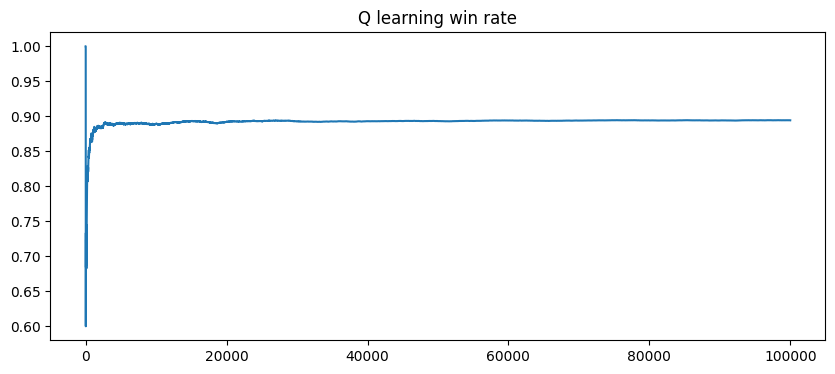

In [8]:
import matplotlib.pyplot as plt
epochs = range(len(win_rate_overtime))
plt.figure(figsize=(10,4))
plt.plot(epochs, win_rate_overtime)
plt.title('Q learning win rate')
plt.show()